<a href="https://colab.research.google.com/github/PavankumarUppar/DLL/blob/main/Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], Loss (Gradient Descent): 27.0138
Epoch [200/1000], Loss (Gradient Descent): 26.3728
Epoch [300/1000], Loss (Gradient Descent): 9.6267
Epoch [400/1000], Loss (Gradient Descent): 4.2507
Epoch [500/1000], Loss (Gradient Descent): 3.2877
Epoch [600/1000], Loss (Gradient Descent): 3.5238
Epoch [700/1000], Loss (Gradient Descent): 16.7978
Epoch [800/1000], Loss (Gradient Descent): 23.4728
Epoch [900/1000], Loss (Gradient Descent): 2.7334
Epoch [1000/1000], Loss (Gradient Descent): 4.0876
Epoch [100/1000], Loss (Stochastic Gradient Descent): 2.5321
Epoch [200/1000], Loss (Stochastic Gradient Descent): 1.3904
Epoch [300/1000], Loss (Stochastic Gradient Descent): 0.7896
Epoch [400/1000], Loss (Stochastic Gradient Descent): 1.0333
Epoch [500/1000], Loss (Stochastic Gradient Descent): 1.0101
Epoch [600/1000], Loss (Stochastic Gradient Descent): 6.2489
Epoch [700/1000], Loss (Stochastic Gradient Descent): 1.0910
Epoch [800/1000], Loss (Stochastic Gradient Descent): 1.5537
Epoch [

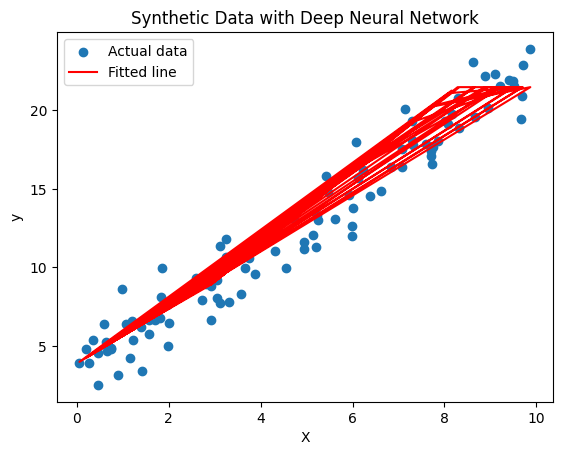

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + 1.5 * np.random.randn(100, 1)  # Linear relationship with noise

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

# Define the neural network architecture
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 10)  # Input layer to hidden layer
        self.layer2 = nn.Linear(10, 10)  # Hidden layer to hidden layer
        self.layer3 = nn.Linear(10, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model
model = DeepNeuralNetwork()

# Define the loss function and optimizer for gradient descent
criterion = nn.MSELoss()
optimizer_gd = optim.SGD(model.parameters(), lr=0.01)

# Define the loss function and optimizer for stochastic gradient descent
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

# Training the neural network with gradient descent
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer_gd.zero_grad()
    loss.backward()
    optimizer_gd.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss (Gradient Descent): {loss.item():.4f}')

# Training the neural network with stochastic gradient descent
for epoch in range(epochs):
    # Shuffle the data for each epoch
    indices = torch.randperm(X_tensor.size(0))
    X_shuffled = X_tensor[indices]
    y_shuffled = y_tensor[indices]

    # Mini-batch SGD with batch size 32
    batch_size = 32
    for i in range(0, len(X_shuffled), batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # Forward pass
        y_pred = model(X_batch)

        # Compute the loss
        loss = criterion(y_pred, y_batch)

        # Backward pass and optimization
        optimizer_sgd.zero_grad()
        loss.backward()
        optimizer_sgd.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss (Stochastic Gradient Descent): {loss.item():.4f}')

# Plot the results
with torch.no_grad():
    model.eval()
    y_pred = model(X_tensor).numpy()

plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, label='Fitted line', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Synthetic Data with Deep Neural Network')
plt.show()